# Raster datasets

In [1]:
import pystac

In [2]:
items = pystac.ItemCollection.from_file("search.json")

In [3]:
items

id: S2A_31UFU_20200328_0_L2A
"bbox: [4.814996623122647, 52.22257539160585, 6.141754296879459, 53.228577890548]"
created: 2022-11-06T06:14:59.218Z
platform: sentinel-2a
constellation: sentinel-2
instruments: ['msi']
eo:cloud_cover: 10.348317
proj:epsg: 32631
mgrs:utm_zone: 31
mgrs:latitude_band: U
mgrs:grid_square: FU


In [4]:
nir09_href = items[0].assets["nir09"].href

In [5]:
import rioxarray

In [6]:
raster = rioxarray.open_rasterio(nir09_href)

In [7]:
raster

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [8]:
raster.rio.crs

CRS.from_epsg(32631)

In [9]:
raster.rio.nodata

0

In [10]:
raster.rio.bounds()

(600000.0, 5790240.0, 709800.0, 5900040.0)

In [11]:
raster.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

In [12]:
raster

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[    0,     0, ...,  9075,  8139],
        [    0,     0, ..., 10358,  8669],
        ...,
        [    0,     0, ...,  4269,  4179],
        [    0,     0, ...,  3503,  3862]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

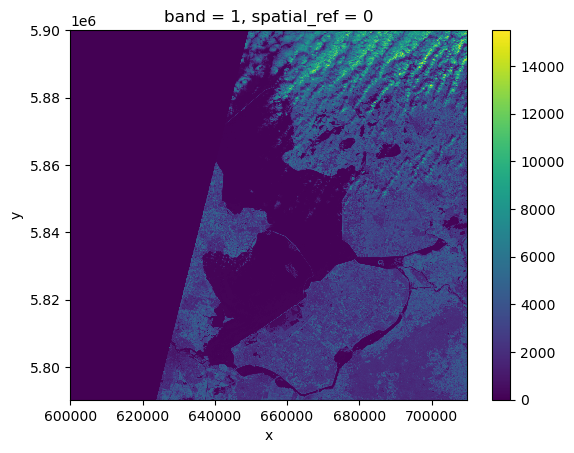

In [13]:
raster.plot()

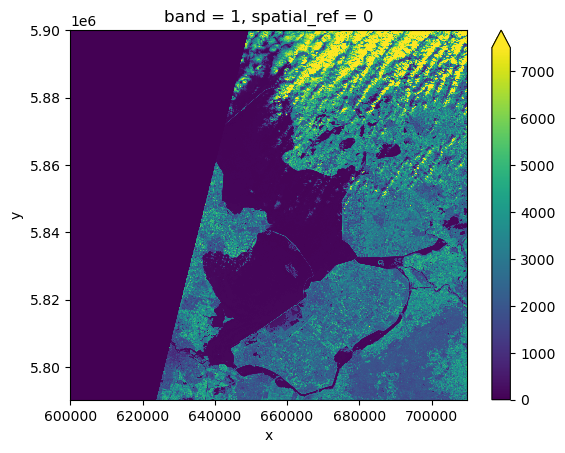

In [14]:
raster.plot(robust=True)

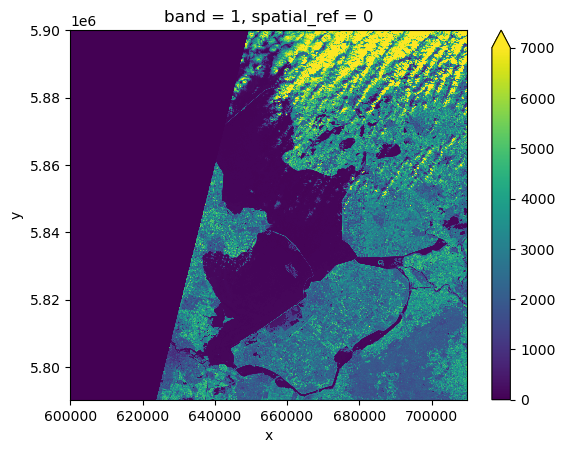

In [15]:
raster.plot(vmin=0, vmax=7000)

## CRS - coordinate reference system

In [18]:
print(raster.rio.crs)

EPSG:32631


In [19]:
import pyproj

In [21]:
epsg_code = raster.rio.crs.to_epsg()

In [22]:
crs = pyproj.CRS(epsg_code)

In [23]:
print(crs)

EPSG:32631


In [24]:
type(crs)

pyproj.crs.crs.CRS

#### Exercise: find the axes units of the CRS

What units are our coordinates in? See if you can find a method to examine this information using `help(crs)` or `dir(crs)`

In [29]:
help(crs)

Help on CRS in module pyproj.crs.crs object:

class CRS(builtins.object)
 |  CRS(projparams: Optional[Any] = None, **kwargs) -> None
 |  
 |  A pythonic Coordinate Reference System manager.
 |  
 |  .. versionadded:: 2.0.0
 |  
 |  See: :c:func:`proj_create`
 |  
 |  The functionality is based on other fantastic projects:
 |  
 |  * `rasterio <https://github.com/mapbox/rasterio/blob/c13f0943b95c0eaa36ff3f620bd91107aa67b381/rasterio/_crs.pyx>`_  # noqa: E501
 |  * `opendatacube <https://github.com/opendatacube/datacube-core/blob/83bae20d2a2469a6417097168fd4ede37fd2abe5/datacube/utils/geometry/_base.py>`_  # noqa: E501
 |  
 |  Attributes
 |  ----------
 |  srs: str
 |      The string form of the user input used to create the CRS.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other: Any) -> bool
 |      Return self==value.
 |  
 |  __getstate__(self) -> Dict[str, str]
 |  
 |  __hash__(self) -> int
 |      Return hash(self).
 |  
 |  __init__(self, projparams: Optional[Any] = None

In [30]:
crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [31]:
crs.coordinate_system

CS[Cartesian,2],
    AXIS["(E)",east,
        ORDER[1],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]],
    AXIS["(N)",north,
        ORDER[2],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]]

In [33]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

In [34]:
raster_reproject = raster.rio.reproject(4326)

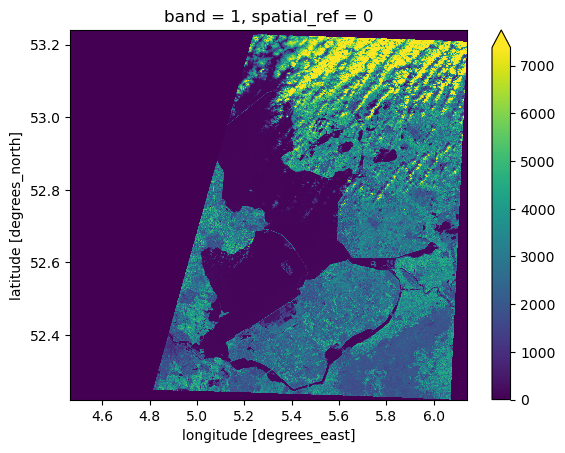

In [36]:
raster_reproject.plot(robust=True)

## Missing values

In [37]:
raster.rio.nodata

0

In [39]:
import numpy as np

In [40]:
np.nan

nan

In [41]:
raster_masked = rioxarray.open_rasterio(nir09_href, masked=True)

In [43]:
raster_masked.values

array([[[   nan,    nan,    nan, ...,  8888.,  9075.,  8139.],
        [   nan,    nan,    nan, ..., 10444., 10358.,  8669.],
        [   nan,    nan,    nan, ..., 10346., 10659.,  9168.],
        ...,
        [   nan,    nan,    nan, ...,  4295.,  4289.,  4320.],
        [   nan,    nan,    nan, ...,  4291.,  4269.,  4179.],
        [   nan,    nan,    nan, ...,  3944.,  3503.,  3862.]]],
      dtype=float32)

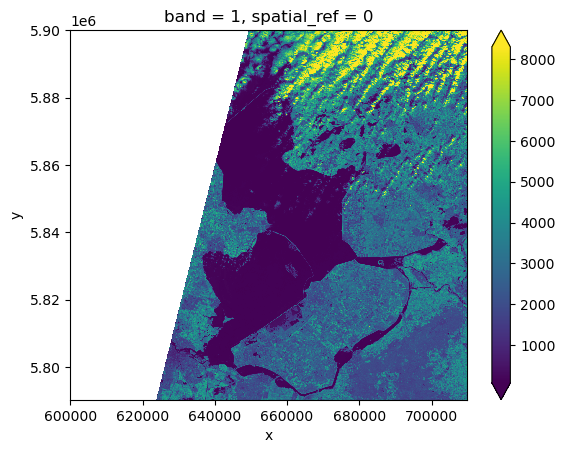

In [44]:
raster_masked.plot(robust=True)

In [46]:
raster

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[    0,     0, ...,  9075,  8139],
        [    0,     0, ..., 10358,  8669],
        ...,
        [    0,     0, ...,  4269,  4179],
        [    0,     0, ...,  3503,  3862]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [45]:
raster_masked

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[   nan,    nan, ...,  9075.,  8139.],
        [   nan,    nan, ..., 10358.,  8669.],
        ...,
        [   nan,    nan, ...,  4269.,  4179.],
        [   nan,    nan, ...,  3503.,  3862.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [47]:
raster.rio.write_nodata

Signature:
raster.rio.write_nodata(
    input_nodata: Optional[float],
    encoded: bool = False,
    inplace=False,
) -> xarray.core.dataarray.DataArray
Docstring:
Write the nodata to the DataArray in a CF compliant manner.

Parameters
----------
input_nodata: Optional[float]
    Nodata value for the DataArray.
    If input_nodata is None, it will remove the _FillValue attribute.
encoded: bool, optional
    If True, it will write the nodata value in the encoding and remove
    the fill value from the attributes. This is useful for masking
    with nodata. Default is False.
inplace: bool, optional
    If True, it will write to the existing DataArray. Default is False.

Returns
-------
:obj:`xarray.DataArray`:
    Modified DataArray with CF compliant nodata information.

Examples
--------
To write the nodata value if it is missing:

>>> raster.rio.write_nodata(-9999, inplace=True)

To write the nodata value on a copy:

>>> raster = raster.rio.write_nodata(-9999)

To mask with nodata:

>

In [48]:
from sys import getsizeof

In [49]:
getsizeof(raster)

96

In [51]:
raster.values.nbytes

6697800

In [53]:
raster_masked.values.nbytes

6697800.0

## raster statistics

In [54]:
raster.mean()

<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0

In [58]:
raster_masked.mean()

<xarray.DataArray ()>
array(2477.405, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [55]:
raster.min()

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0

In [57]:
raster_masked.min()

<xarray.DataArray ()>
array(8., dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [59]:
raster_max = raster.max()

In [63]:
raster_masked.max()

<xarray.DataArray ()>
array(15497., dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [62]:
raster_masked.max(dim=("x", "y"))

<xarray.DataArray (band: 1)>
array([15497.], dtype=float32)
Coordinates:
  * band         (band) int64 1
    spatial_ref  int64 0

## Multiband rasters

In [69]:
visual_href = items[0].assets["visual"].href 

In [71]:
visual = rioxarray.open_rasterio(visual_href)

In [72]:
visual

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
[361681200 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [73]:
visual_overview_0 = rioxarray.open_rasterio(visual_href, overview_level=0)

In [74]:
visual_overview_0

<xarray.DataArray (band: 3, y: 5490, x: 5490)>
[90420300 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [75]:
visual_overview_1 = rioxarray.open_rasterio(visual_href, overview_level=1)

In [76]:
visual_overview_1

<xarray.DataArray (band: 3, y: 2745, x: 2745)>
[22605075 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [81]:
visual_overview_2 = rioxarray.open_rasterio(visual_href, overview_level=2, masked=True)

In [82]:
visual_overview_2

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
[5655387 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

(array([1944346.,  993311., 1233194.,  509238.,  205142.,  138521.,
         111016.,   83858.,   75834.,  360927.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

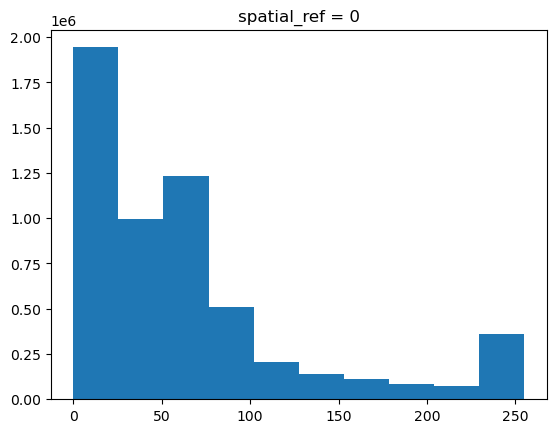

In [79]:
visual_overview_2.plot()

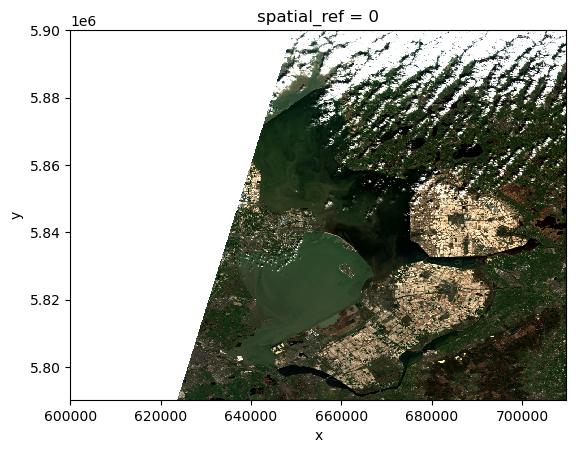

In [84]:
visual_overview_2.plot.imshow(robust=True)